In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('for_modeling.csv')
df['Geographic Level'] = df['Geographic Level'].fillna('City')

mun = df[df['Geographic Level'] == 'Mun']
city = df[df['Geographic Level'] == 'City']

###CITY###
X_city = city[city.columns[33:]]
X_city['school'] = X_city['school'].fillna(value=0)
X_city.drop(['streets_per_node_counts','streets_per_node_proportion'], axis=1, inplace=True)
y_city = city['IC']


###MUNICIPALITY###
X_mun = mun[mun.columns[33:]]
X_mun['school'] = X_mun['school'].fillna(value=0)
X_mun.drop(['streets_per_node_counts','streets_per_node_proportion'], axis=1, inplace=True)
y_mun = mun['IC']


#X = X.iloc[:,[405, 407, 409, 404, 402, 413, 0, 408, 412, 416]]

<ipython-input-1-b43206137e2a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_city['school'] = X_city['school'].fillna(value=0)
/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-1-b43206137e2a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Counter({1.0: 69, 3.0: 32, 4.0: 27, 2.0: 16, 5.0: 10, 6.0: 5})


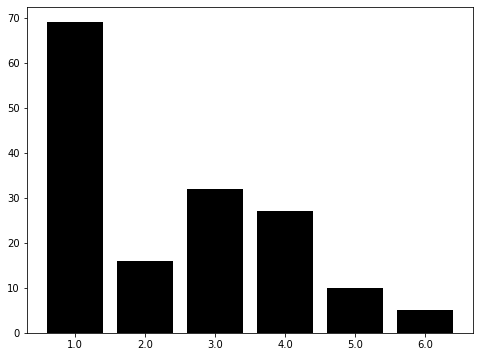

Counter({4.0: 376, 1.0: 327, 3.0: 264, 5.0: 262, 2.0: 181, 6.0: 36})


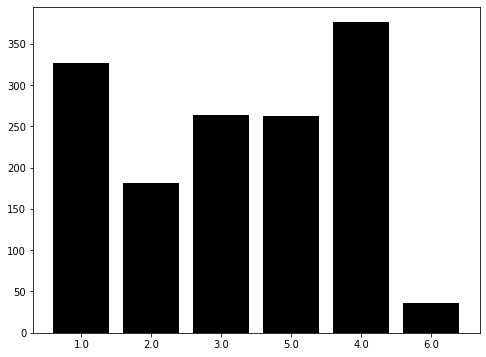

In [2]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

counter1 = Counter(y_city)
print(counter1)
fig = plt.figure(figsize=(8,6))
plt.bar(range(len(counter1)), list(counter1.values()), align='center', color='k')
plt.xticks(range(len(counter1)), list(counter1.keys()))
plt.show()

counter2 = Counter(y_mun)
print(counter2)
fig = plt.figure(figsize=(8,6))
plt.bar(range(len(counter2)), list(counter2.values()), align='center', color='k')
plt.xticks(range(len(counter2)), list(counter2.keys()))
plt.show()

In [4]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(k_neighbors=2)
X_city, y_city = oversample.fit_resample(X_city, y_city)
X_mun, y_mun = oversample.fit_resample(X_mun, y_mun)

Counter({1.0: 69, 2.0: 69, 3.0: 69, 4.0: 69, 5.0: 69, 6.0: 69})


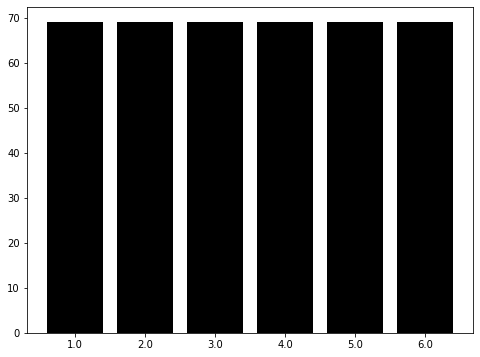

Counter({1.0: 376, 2.0: 376, 3.0: 376, 5.0: 376, 4.0: 376, 6.0: 376})


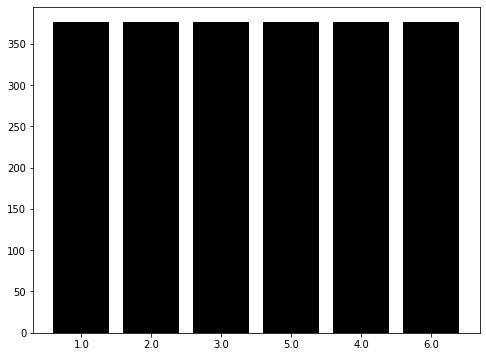

In [5]:
counter1 = Counter(y_city)
print(counter1)
fig = plt.figure(figsize=(8,6))
plt.bar(range(len(counter1)), list(counter1.values()), align='center', color='k')
plt.xticks(range(len(counter1)), list(counter1.keys()))
plt.show()

counter2 = Counter(y_mun)
print(counter2)
fig = plt.figure(figsize=(8,6))
plt.bar(range(len(counter2)), list(counter2.values()), align='center', color='k')
plt.xticks(range(len(counter2)), list(counter2.keys()))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_city, y_city, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mun, y_mun, random_state=1)

from sklearn.preprocessing import StandardScaler
X_1 = X_train1.values
X_2 = X_train2.values
X_std1 = StandardScaler().fit_transform(X_1)
X_std2 = StandardScaler().fit_transform(X_2)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec1 = np.mean(X_std1, axis=0)
mean_vec2 = np.mean(X_std2, axis=0)
cov_mat1 = np.cov(X_std1.T)
cov_mat2 = np.cov(X_std2.T)

eig_vals1, eig_vecs1 = np.linalg.eig(cov_mat1)
eig_vals2, eig_vecs2 = np.linalg.eig(cov_mat2)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs1 = [ (np.abs(eig_vals1[i]),eig_vecs1[:,i]) for i in range(len(eig_vals1))]
eig_pairs2 = [ (np.abs(eig_vals2[i]),eig_vecs2[:,i]) for i in range(len(eig_vals2))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs1.sort(key = lambda x: x[0], reverse= True)
eig_pairs2.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot1 = sum(eig_vals1)
tot2 = sum(eig_vals2)
var_exp1 = [(i/tot1)*100 for i in sorted(eig_vals1, reverse=True)] # Individual explained variance
var_exp2 = [(i/tot2)*100 for i in sorted(eig_vals2, reverse=True)] # Individual explained variance
cum_var_exp1 = np.cumsum(var_exp1) # Cumulative explained variance
cum_var_exp2 = np.cumsum(var_exp2) # Cumulative explained variance


# Find the eigenvector beyond which 90% of the data is explained
print([ n for n,i in enumerate(cum_var_exp1) if i>90 ][0])
print([ n for n,i in enumerate(cum_var_exp2) if i>90 ][0])

34
86


In [7]:
# Call the PCA method with n components. 

from sklearn.decomposition import PCA
pca1 = PCA(n_components=34)
pca2 = PCA(n_components=86)
pca1.fit(X_std1)
pca2.fit(X_std2)
X_pca1 = pca1.transform(X_std1)
X_pca2 = pca2.transform(X_std2)

from sklearn.ensemble import RandomForestClassifier as RF
# Use 25 decision trees in our random forest and initialize
clf1 = RF(n_estimators = 500)
clf2 = RF(n_estimators = 500)

# Train the classifier
clf1 = clf1.fit(X_pca1,y_train1)
clf2 = clf2.fit(X_pca2,y_train2)

test_values1 = X_test1.values
test_values2 = X_test2.values
test_std1 = StandardScaler().fit_transform(test_values1)
test_std2 = StandardScaler().fit_transform(test_values2)
test_pca1 = pca1.transform(test_std1)
test_pca2 = pca2.transform(test_std2)

y_pred1 = clf1.predict(test_pca1)
y_pred2 = clf2.predict(test_pca2)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.accuracy_score(y_test2, y_pred2))

0.8269230769230769
0.32269503546099293


In [20]:
X_pca1.shape

(310, 34)

In [24]:
a = np.vstack((X_pca1, test_pca1))
b = np.vstack((X_pca2, test_pca2))

In [30]:
c = np.hstack((y_train1, y_test1))
d = np.hstack((y_train2, y_test2))

In [31]:
c.shape

(414,)

/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

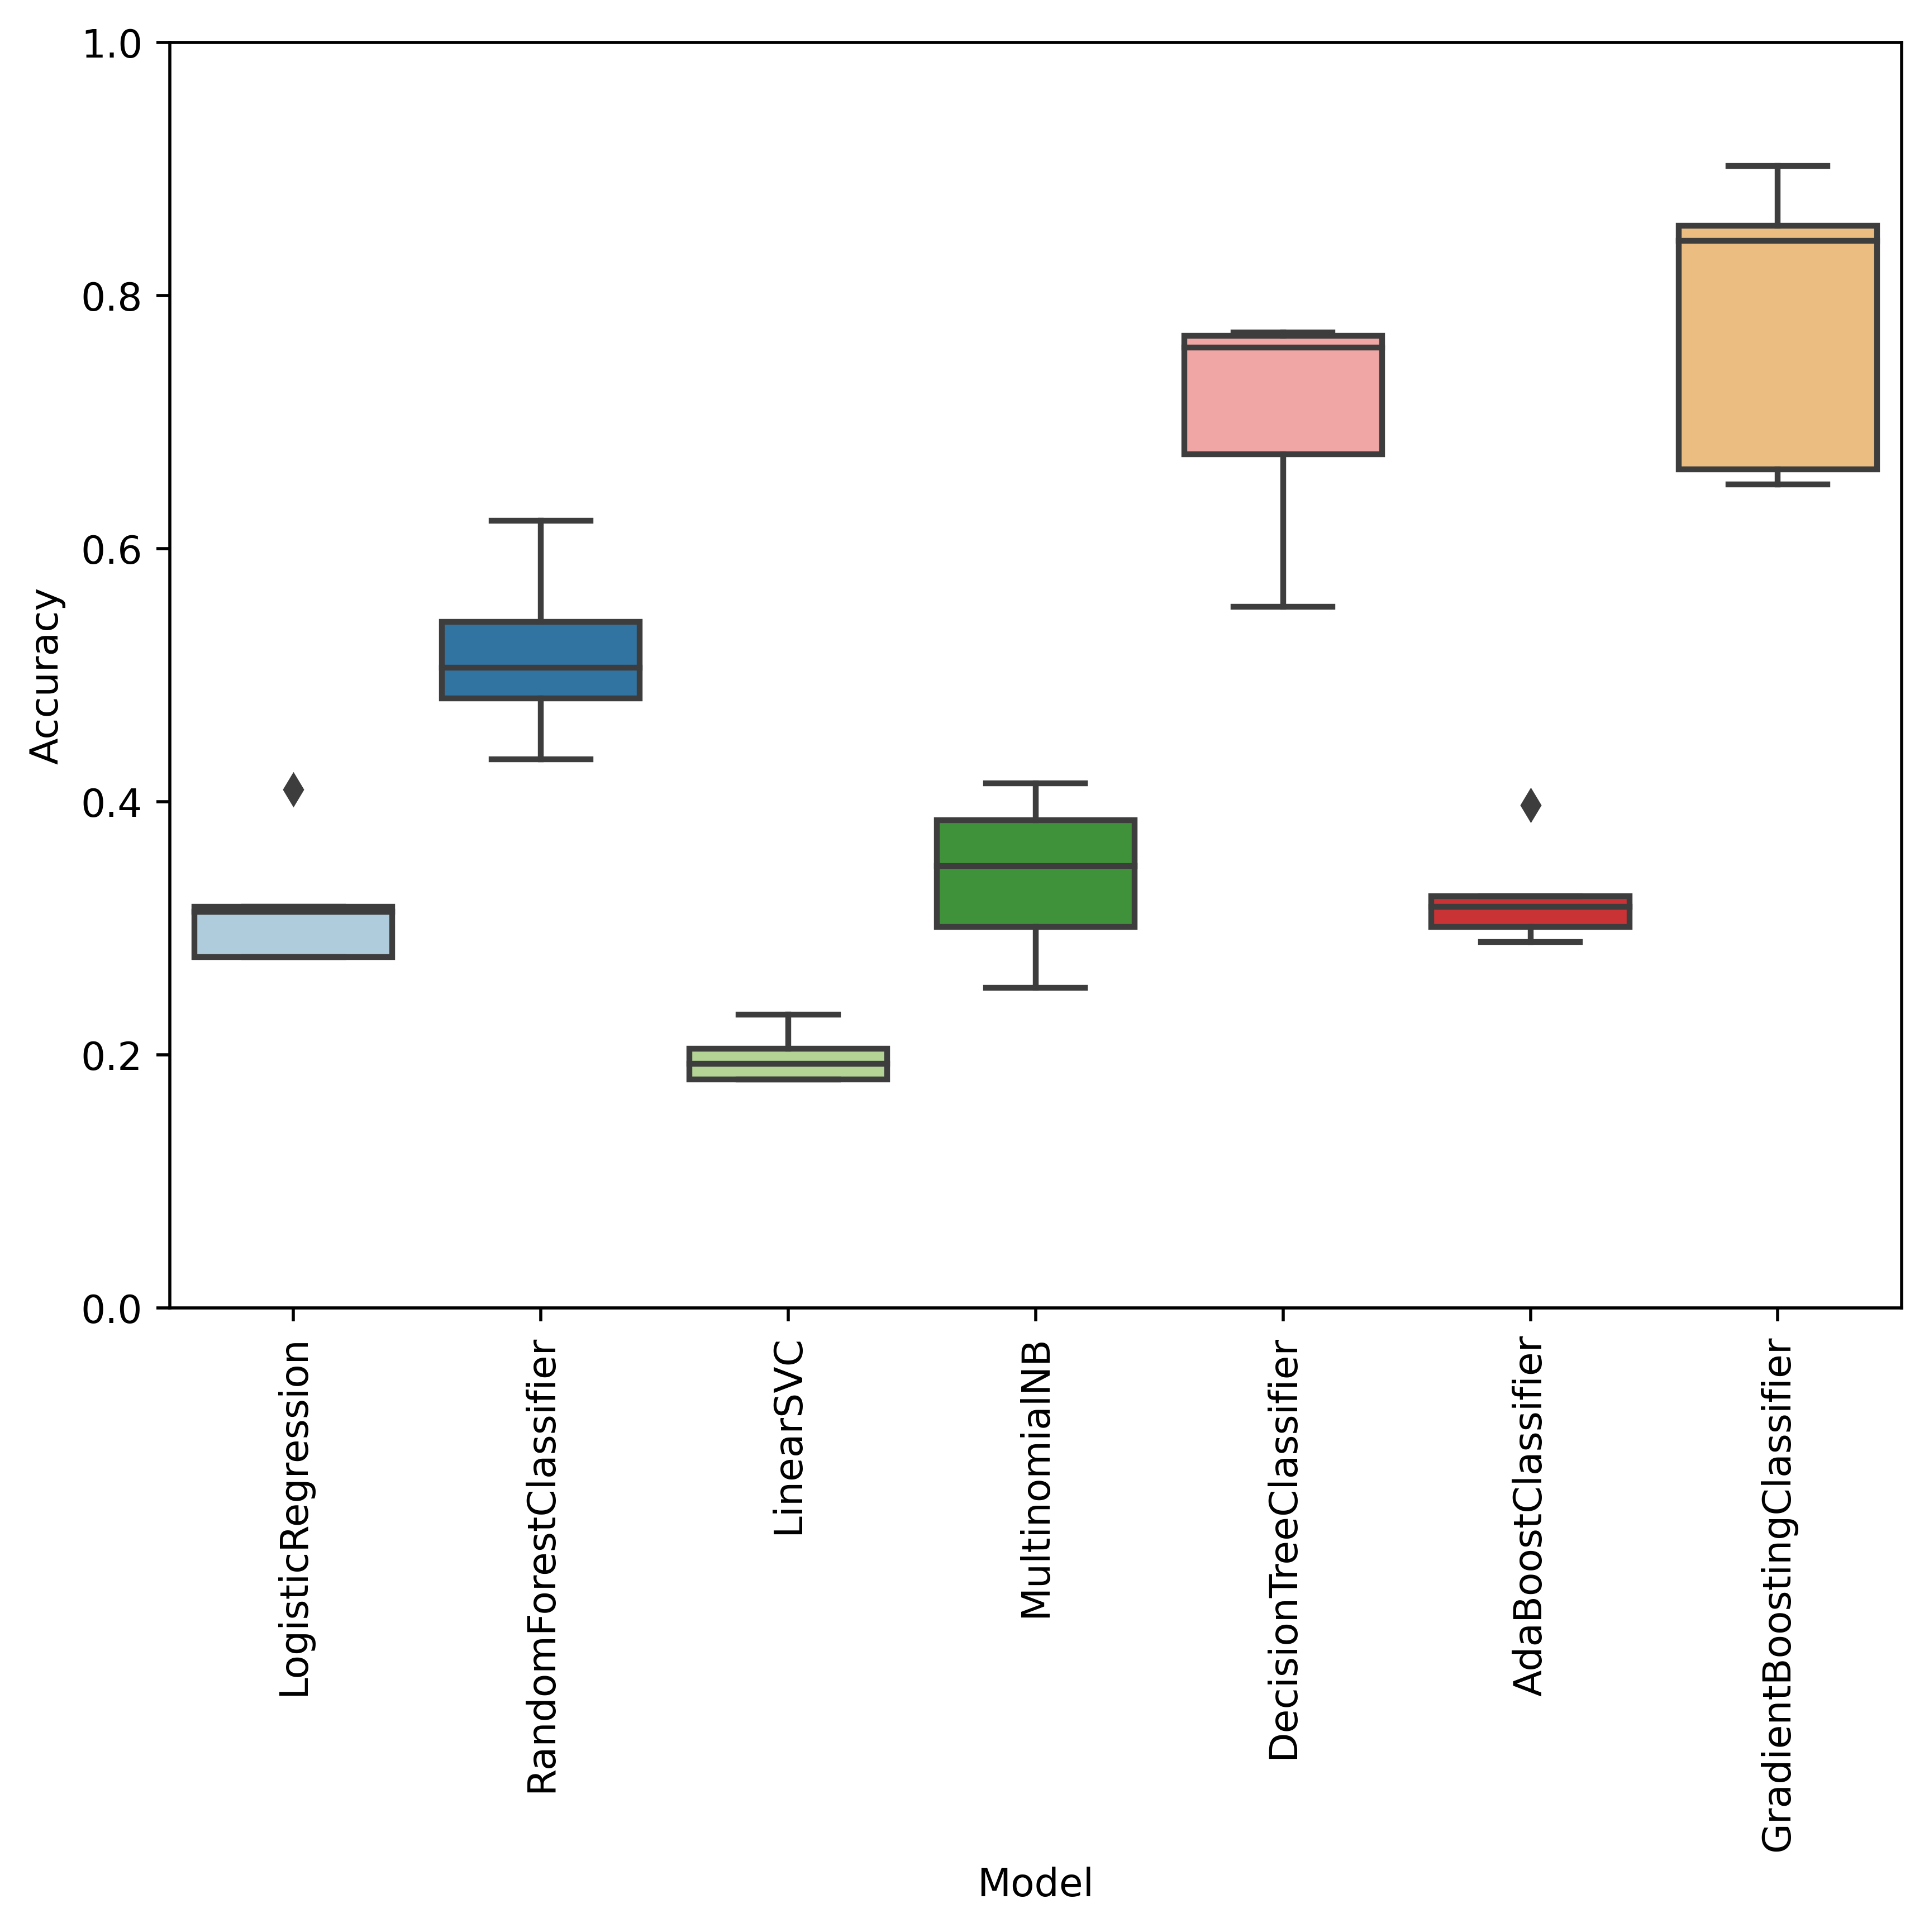

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=11),
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=20),
    GradientBoostingClassifier(n_estimators=20)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_city, y_city, scoring='accuracy', cv=CV)
#     accuracies = cross_val_score(model, a, c, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
fig = plt.figure(figsize=(8,6), dpi=500)
g = sns.boxplot(x='model_name', y='accuracy', data=cv_df, palette='Paired')

g.set_xticklabels(g.get_xticklabels(),rotation=60)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90) 
plt.ylim(0,1)
plt.show()

In [42]:
cv_df.groupby('model_name').accuracy.max()

model_name
AdaBoostClassifier            0.397590
DecisionTreeClassifier        0.771084
GradientBoostingClassifier    0.902439
LinearSVC                     0.231707
LogisticRegression            0.409639
MultinomialNB                 0.414634
RandomForestClassifier        0.621951
Name: accuracy, dtype: float64

/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

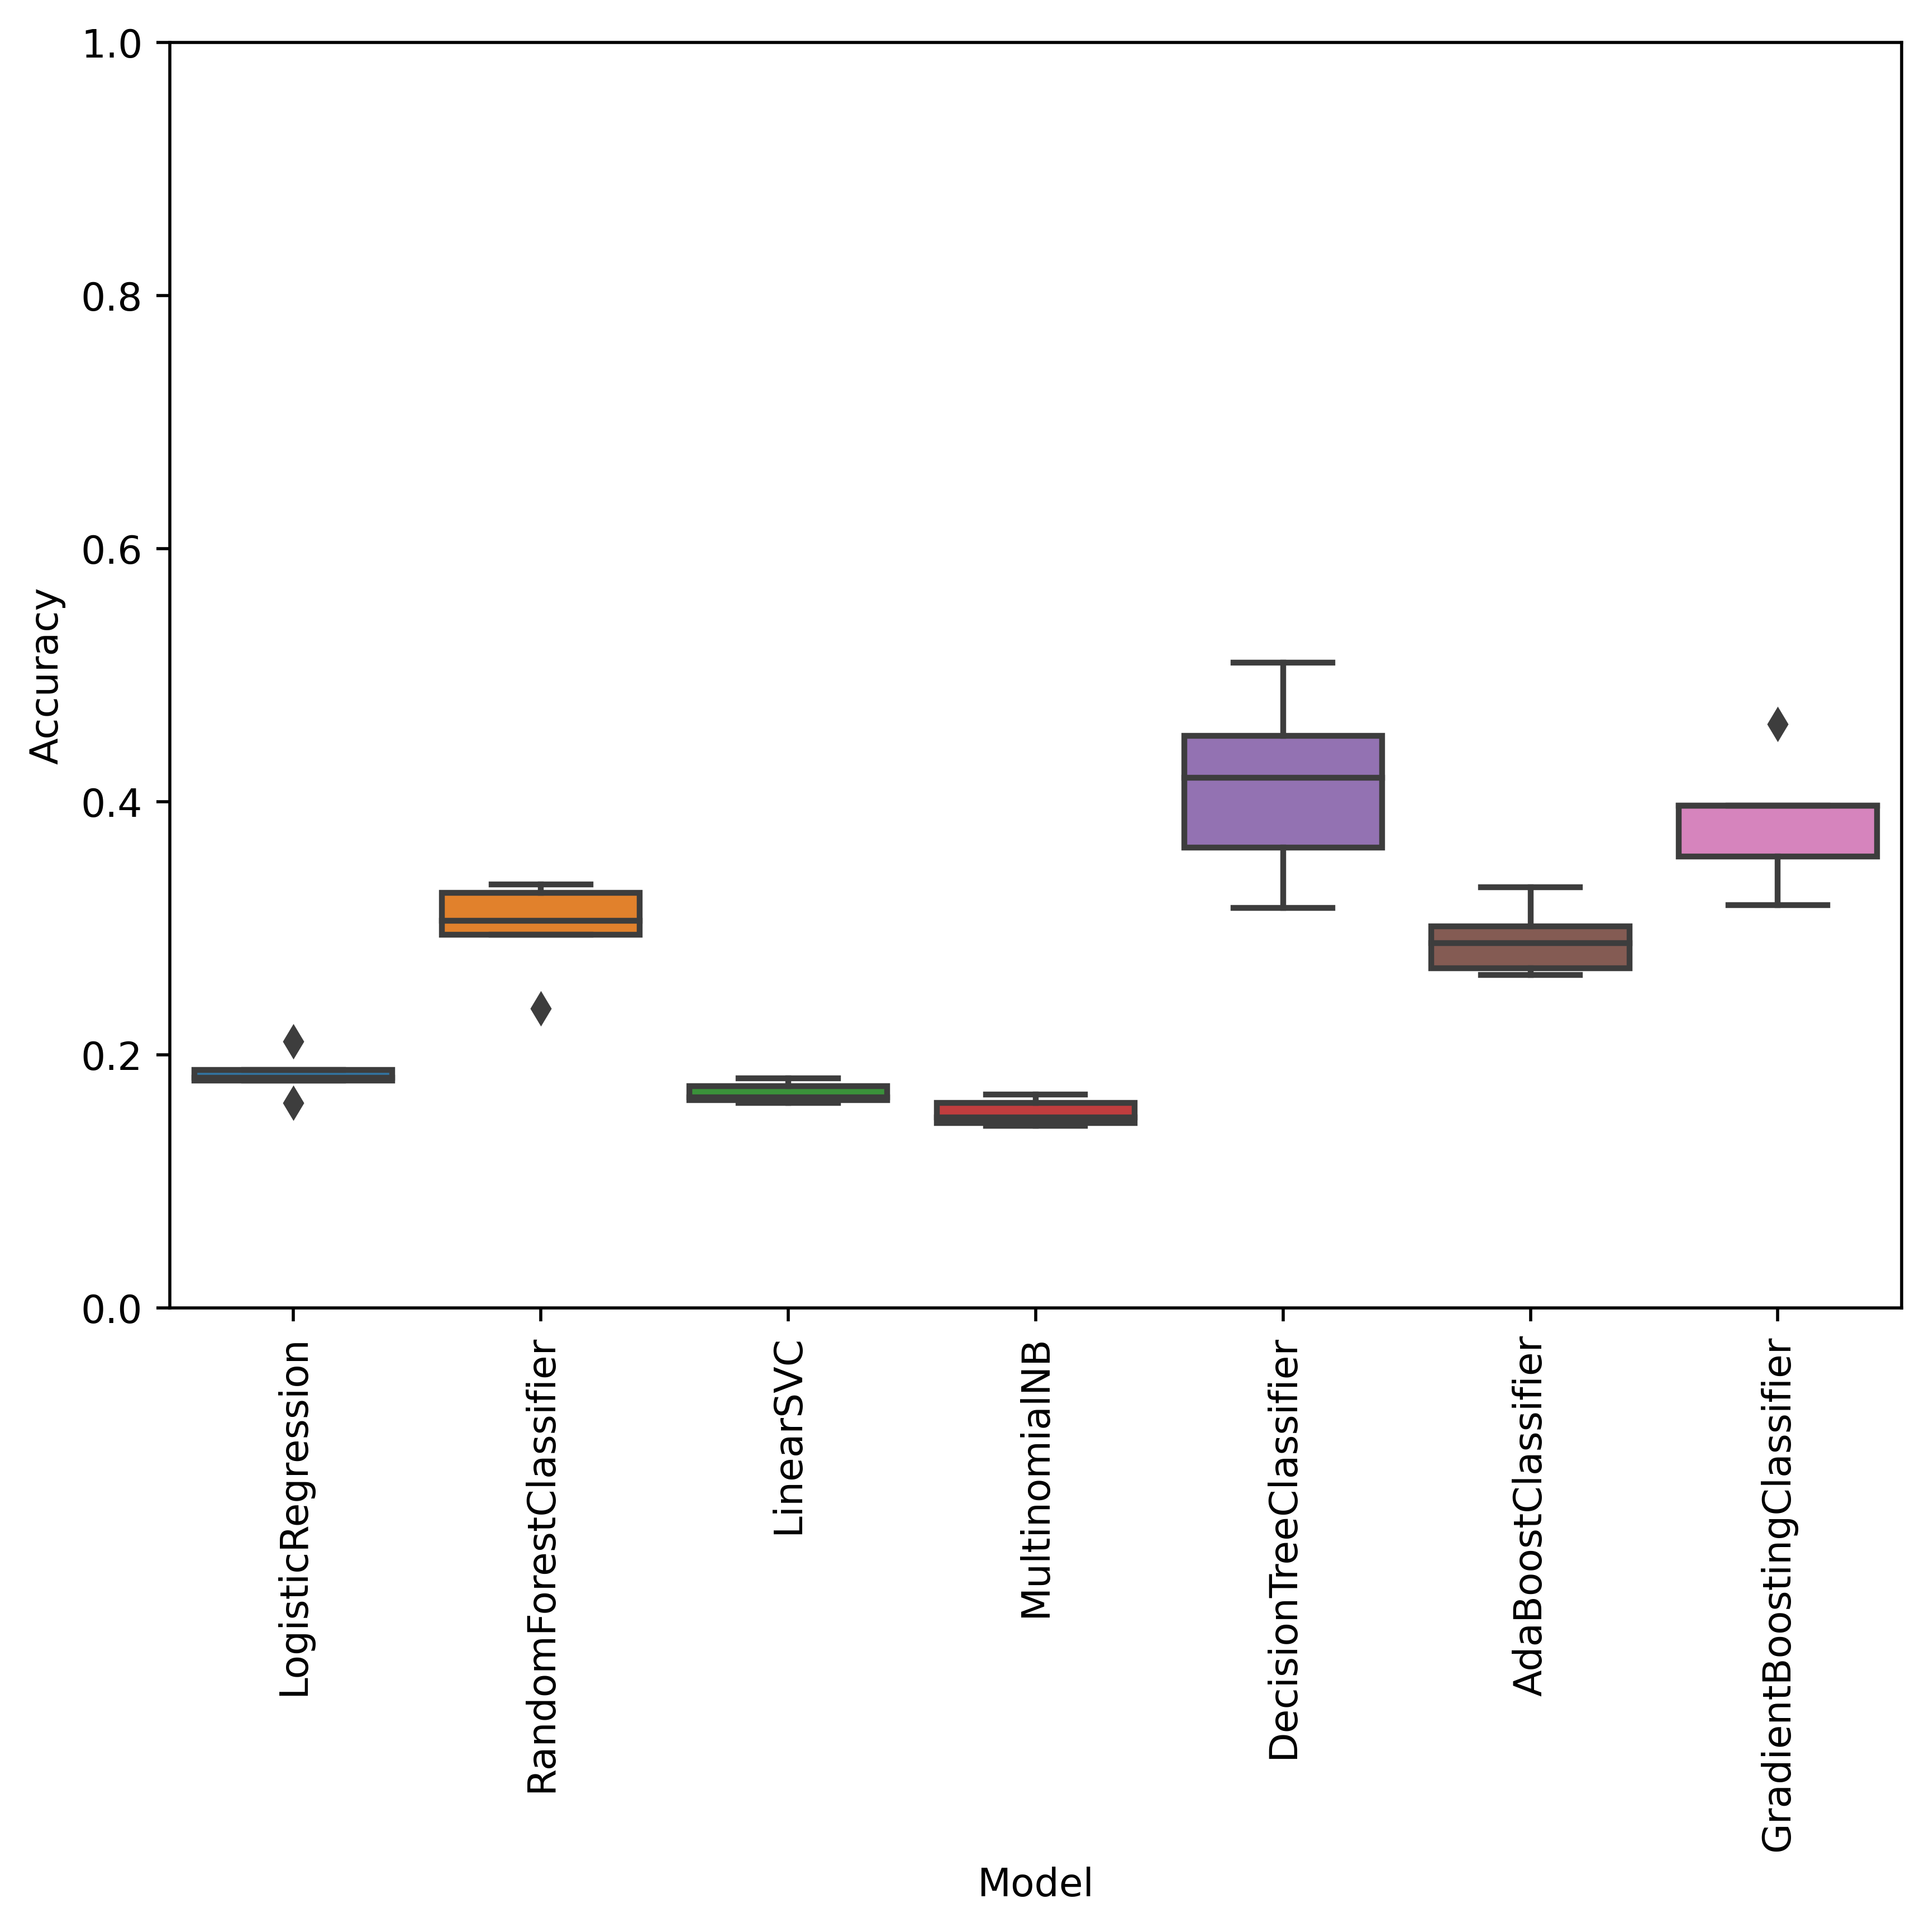

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=11),
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=20),
    GradientBoostingClassifier(n_estimators=20)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_mun, y_mun, scoring='accuracy', cv=CV)
#     accuracies = cross_val_score(model, b, d, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
fig = plt.figure(figsize=(8,6), dpi=500)
g = sns.boxplot(x='model_name', y='accuracy', data=cv_df)

g.set_xticklabels(g.get_xticklabels(),rotation=60)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [45]:
cv_df.groupby('model_name').accuracy.max()

model_name
AdaBoostClassifier            0.332594
DecisionTreeClassifier        0.509978
GradientBoostingClassifier    0.461197
LinearSVC                     0.181416
LogisticRegression            0.210643
MultinomialNB                 0.168514
RandomForestClassifier        0.334812
Name: accuracy, dtype: float64